In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats
from nba_api.stats.endpoints.leaguehustlestatsteam import LeagueHustleStatsTeam
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes

In [5]:
team_hustle = LeagueHustleStatsTeam(per_mode_time='PerGame', season='2021-22').get_data_frames()[0]

In [8]:
team_advanced = LeagueDashTeamStats(season='2021-22', per_mode_detailed='PerGame', measure_type_detailed_defense='Advanced').get_data_frames()[0]

In [9]:
merged_df = pd.merge(left=team_hustle, right=team_advanced, on=['TEAM_NAME', 'TEAM_ID'])

In [16]:
plt.style.use('fivethirtyeight')

In [17]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


import matplotlib.ticker as mtick

zoom = 0.1
team_root_dir = '../../team_logos_id/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

In [14]:
merged_df.loc[:, 'DREB_PCT'] = merged_df.DREB_PCT * 100

AttributeError: 'DataFrame' object has no attribute 'DEF_BOXOUTS'

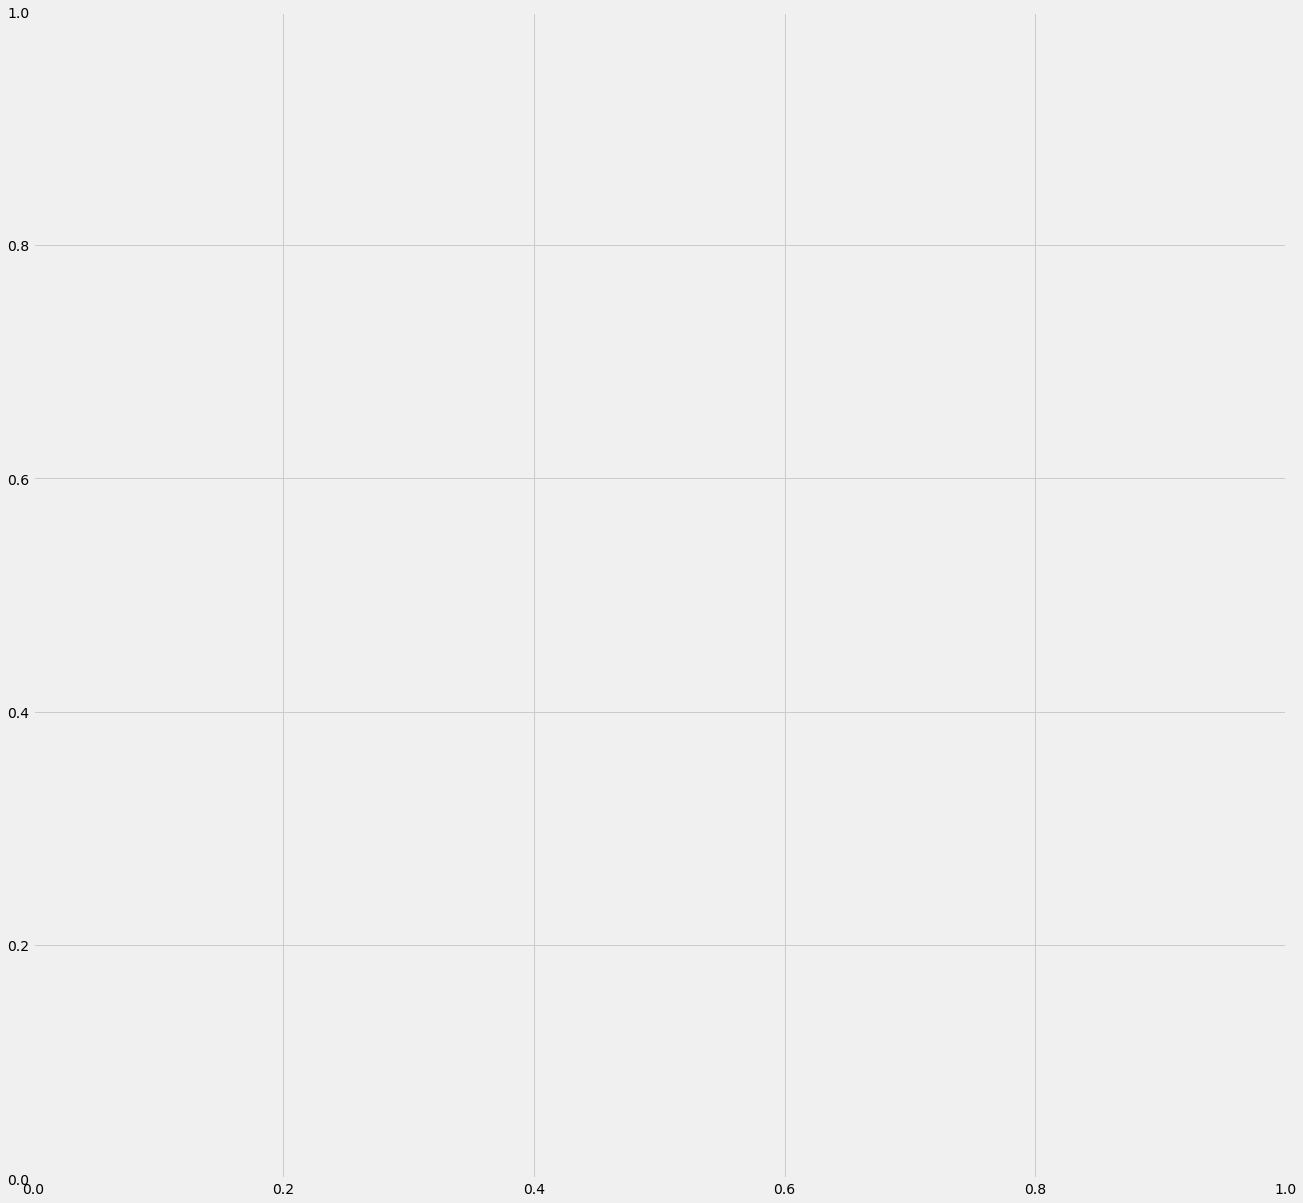

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(merged_df.DEF_BOXOUTS, y=merged_df.DREB_PCT, s=10)

for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    ab = AnnotationBbox(get_team_img(item.TEAM_ID), (item.DEF_BOXOUTS, item.DREB_PCT), frameon=False)
    ax.add_artist(ab)
    

ax.set_xlabel("Defensive box outs per game")
ax.set_ylabel("Defensive Rebound%")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Correlation between defensive box outs per game and DREB%")

### ISOs and Off Rtg

In [5]:
team_advanced = LeagueDashTeamStats(season='2021-22', per_mode_detailed='PerGame', measure_type_detailed_defense='Advanced').get_data_frames()[0]

In [11]:
team_isos = SynergyPlayTypes(per_mode_simple='PerGame', season='2021-22', player_or_team_abbreviation='T', play_type_nullable='Isolation', type_grouping_nullable='offensive').get_data_frames()[0]

In [14]:
merged_df = pd.merge(left=team_advanced, right=team_isos, on=('TEAM_ID', 'TEAM_NAME'))

Text(0.5, 1.0, 'Do more isolations negatively affect Off Rating?')

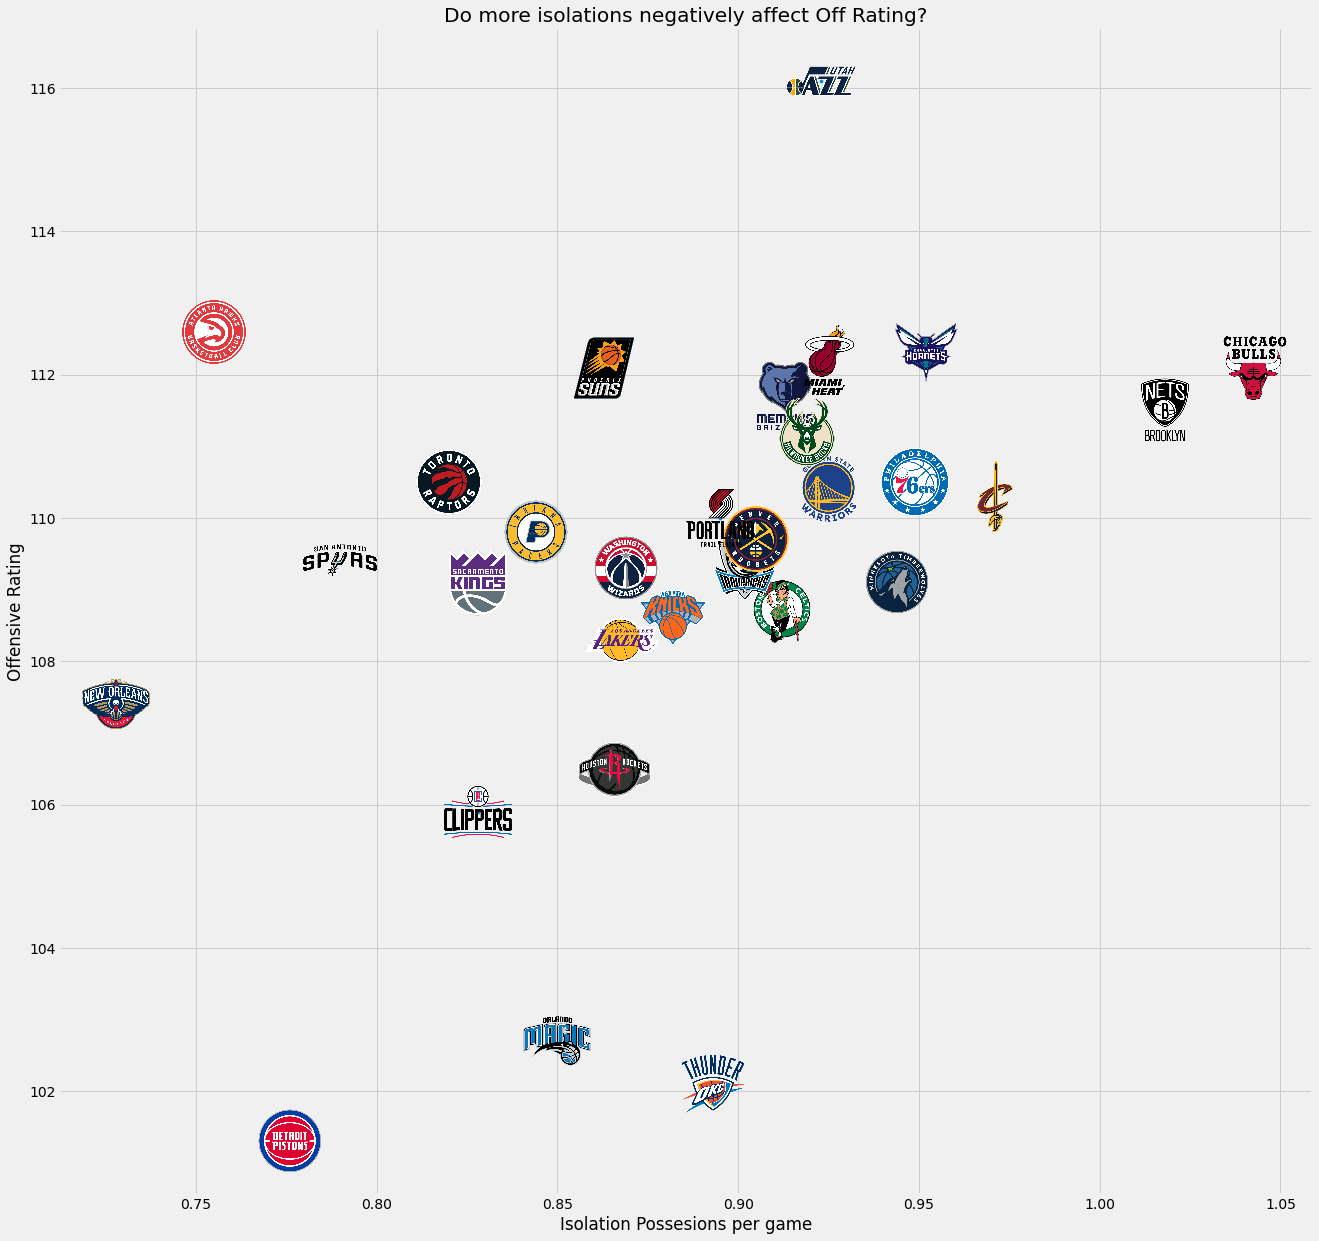

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(merged_df.PPP, y=merged_df.OFF_RATING, s=10)

for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    ab = AnnotationBbox(get_team_img(item.TEAM_ID), (item.PPP, item.OFF_RATING), frameon=False)
    ax.add_artist(ab)
    

ax.set_xlabel("Isolation Possesions per game")
ax.set_ylabel("Offensive Rating")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Do more isolations negatively affect Off Rating?")